# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *K*

**Names:**

* *Mathieu Sauser*
* *Luca Mouchel*
* *Heikel Jebali*
* *Jérémy Chaverot*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [113]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
from math import factorial as fact
def binomial(n, r):
    return fact(n) // fact(r) // fact(n - r)

In [88]:
# Load a nx graph from the network1.csv file
G = nx.read_edgelist('../data/network1.csv', create_using=nx.Graph(), delimiter=',', comments='#', nodetype=int)

# Print some graph stats
print("Number of nodes in Network1:", G.number_of_nodes())
print("Number of edges in Network1:", G.number_of_edges())

Number of nodes in Network1: 13033
Number of edges in Network1: 18584


#### Exercise 2.2:  Node degree distribution

Question 1: An histogram with a log-scaled y-axis is the best representation for the node degree distribution, since very few nodes have a very high degree, while most of the nodes have a very low degree.
Furthermore a graph of the Log-Log complementary cumulative distribution function (CCDF) of the degrees of the network is useful to estimate the parameters of a power law distribution, more precisely of a Pareto distribution.

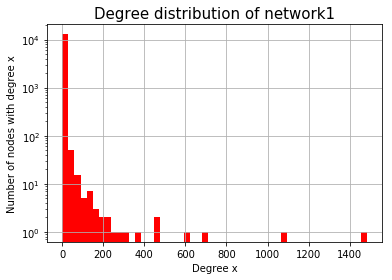

In [89]:
# Get the list of degrees of network1
degrees = np.array(list(dict(G.degree()).values()))

# Plot the y-axis-log-scaled histogram of the degree distribution for network1
plt.hist(degrees, bins=50, log=True, color='red')
plt.title("Degree distribution of network1", fontsize=15)
plt.xlabel("Degree x")
plt.ylabel("Number of nodes with degree x")
plt.grid()
plt.show()

Question 2: Here is a list of the properties of the degree distribution of network1.

In [90]:
# Compute the min, max, mean, the median and standard deviation of the degree distribution of network1
print(f"- min value = {np.min(degrees)}")
print(f"- max value = {np.max(degrees)}")
print(f"- mean = {np.mean(degrees)}")
print(f"- median = {np.median(degrees)}")
print(f"- standard deviation = {np.std(degrees)}")

- min value = 1
- max value = 1482
- mean = 2.8518376429064682
- median = 1.0
- standard deviation = 20.859853773744813


We plot the graph of the Log-Log degree distribution of network1.

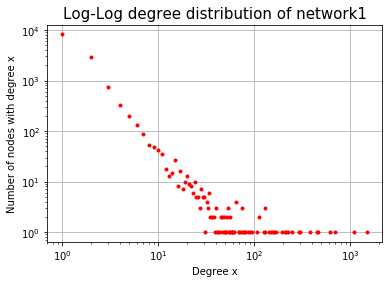

In [91]:
# Retrieve the list of unique degrees and for each of them the number of nodes having it
unique_degrees, counts = np.unique(degrees, return_counts=True)

# Plot the graph of the Log-Log degree distribution for network1
plt.loglog(unique_degrees, counts, '.', color='red')
plt.title("Log-Log degree distribution of network1", fontsize=15)
plt.xlabel("Degree x")
plt.ylabel("Number of nodes with degree x")
plt.grid()
plt.show()

We plot the graph of the complementary cumulative degree distribution of network1.

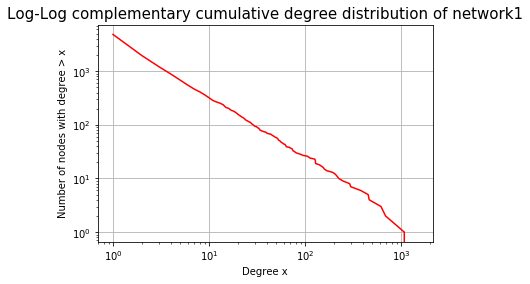

In [92]:
# Compute the complementary cumulative counts for the degrees
cum_counts = np.cumsum(counts)
max_cum_count = max(cum_counts)
complementary_cum_counts = [max_cum_count - x for x in cum_counts]

# Plot the graph of the Log-Log complementary cumulative degree distribution of for network1
plt.loglog(unique_degrees, complementary_cum_counts, color='red')
plt.title("Log-Log complementary cumulative degree distribution of network1", fontsize=15)
plt.xlabel("Degree x")
plt.ylabel("Number of nodes with degree > x")
plt.grid()
plt.show()

Question 3: The degree distribution is close to a power law distribution, like the well-known Pareto($\beta, \gamma$) probability distribution (taking the same notation as in the course slides).

For the scale parameter $\beta$, we have $\beta = 1$ since the minimum degree is 1.

For the Pareto index $\gamma$, we can use the mean of the degree distribution we computed earlier, as we know that the expected value of a random variable $X$ following a Pareto($\beta, \gamma$) distribution is 

$$
E(X) = \left\{
    \begin{array}{ll}
        \infty & \mbox{if} \quad \gamma \leq 1 \\
        (\gamma * \beta) / (\gamma - 1) & \mbox{otherwise.}
    \end{array}
\right.
$$

Thus $\gamma = E(X)/(E(X) - 1)$ (when $\gamma > 1$). This yields $\gamma = 1.54$ after some computations.

Another way is to compute the slope $s$ of the Log-Log complementary cumulative distribution, and then $\gamma=-s$.


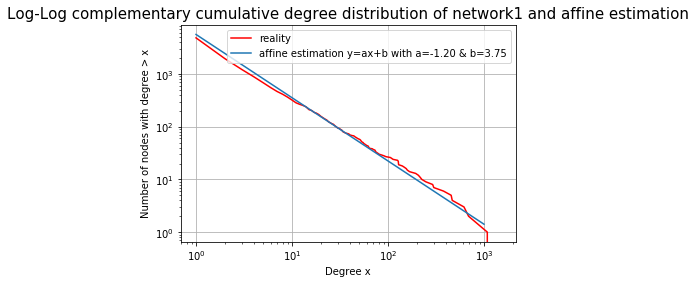

In [93]:
# Coefficients of the y = ax+b line in the Log-Log plot after trying some values
a = -1.20
b = 3.75

# Compute the values the afine estimation, given that y=ax+b in a Log-Log scale 
# becomes y'= x'**a * 10**b in a normal scale
x_axis = np.linspace(10**0, 10**3, 10**1)
y_axis = x_axis**a * 10**b

# Plot the graph of the complementary cumulative degree distribution of network1 and the affine estimation
plt.loglog(unique_degrees, complementary_cum_counts, color='red')
plt.loglog(x_axis, y_axis, color='blue')

plt.title("Log-Log complementary cumulative degree distribution of network1 and affine estimation", fontsize=15)
plt.xlabel("Degree x")
plt.ylabel("Number of nodes with degree > x")
plt.legend(['reality', 'affine estimation y=ax+b with a=-1.20 & b=3.75'])
plt.grid()
plt.show()

With this method, we get a $\gamma=1.20$.

#### Exercise 2.3: Giant component

In [94]:
print("Number of connected components in network1:", nx.number_connected_components(G))
sorted_connected_components = sorted(nx.connected_components(G))

print("Size of the largest connected component:", len(sorted_connected_components[0]))
print("Size of the second largest connected component:", len(sorted_connected_components[1]))

percentage = len(sorted_connected_components[0]) / G.number_of_nodes() * 100
print(f"The largest connected component contains {percentage}% of all the nodes in the network.")

Number of connected components in network1: 192
Size of the largest connected component: 12576
Size of the second largest connected component: 7
The largest connected component contains 96.49351645822144% of all the nodes in the network.


1. There are 192 connected components in network1.

2. We can observe that the first connected component is much large in size than the second one, containing 12576 nodes, in other words it contains 96,5% of all the nodes in the network. Hence there is indeed a giant component.


#### Exercise 2.4: Short paths & Small-worlds

In [ ]:
# Retrieve only the non-zero shortest paths and the one not already counted between any two nodes in network1
all_shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

lengths = []
for starting_node in all_shortest_path_lengths.values(): 
    for length in starting_node.values():
        if length > 0: lengths.append(length)
        
# Plot the distribution of path lengths between any two nodes in network1
plt.hist(lengths, bins = 25, density=True)
plt.title("Distribution of path lengths between any two nodes in network1", fontsize=15)
plt.xlabel("Path length x")
plt.ylabel("Proportion of paths with path length x")
plt.grid()
plt.show()

In [117]:
# Compute the average path length between any two nodes in network1
print(f"Average path length: {np.mean(lengths)}")

# Average number of nodes reachable within a distance r=6 (in number of hops) of any other node in network1
lengths_sublist = [x for x in lengths if x <= 6]
percentage = (len(lengths_sublist) / 2) / binomial(G.number_of_nodes(), 2) * 100
# We divide the size of lengths_sublist by 2 so not to count the shortest path between
# any two nodes twice. Then 'binomial(G.number_of_nodes(), 2)' denotes the number of edges
# if the graph of the network was complete.
print(f"Among all nodes in network1, {percentage}% of them are reachable within a distance r=6 of any other node.")

Average path length: 4.175471997290978
Among all nodes in network1, 90.96353935943029% of them are reachable within a distance r=6 of any other node.


#### Exercise 2.5: Network comparison

#### Exercise 2.6: Network identification